## 1 Convergence with Stable Input Rate

The data used in this section is in `trace/limit-rate`.

### 1.1 Load Data

In [2]:
import os
import re

import numpy as np

def get_sort_key(filename):
    match = re.match(r'(\w+)\.(\d+)\.txt', filename)
    if match:
        name, timestamp = match.groups()
        return (name, int(timestamp))
    else:
        return (filename,)

""" 
brief: load data from folderpath
param: 
    * folderpath: path to folder containing data files
return:
    * datas: list of data
        [
            [
                [1, 2, 3],              # test 1
                [1, 2, 3],              # test 2
                ...                     # ...
            ],                          # data of node 0
            [
                [1, 2, 3],              # test 1
                [1, 2, 3],              # test 2
                ...                     # ...
            ],                          # data of node 1
            ...
        ]
"""
def load_data(folderpath):
    datas = []
    files = os.listdir(folderpath)
    files = sorted(files, key=get_sort_key)
    next_idx = 0
    multi_datas = []
    for file in files:
        idx = int(file.split(".")[0])
        if next_idx != idx:
            datas.append(multi_datas)
            multi_datas = []
            next_idx = idx
        with open(folderpath + "/" + file, "r") as f:
            data = f.readlines()
            data = [float(x) for x in data]
            multi_datas.append(data)
    datas.append(multi_datas)

    return np.array(datas)

datas = load_data("../trace/limit-rate")
print(datas.shape)
print(datas)

(10, 100, 100)
[[[0.1       0.0996698 0.0993418 ... 0.0758974 0.0757149 0.0755336]
  [0.1       0.0967939 0.0937331 ... 0.0244695 0.0243718 0.0242765]
  [0.1       0.0985856 0.0971975 ... 0.0348618 0.0346072 0.0343568]
  ...
  [0.1       0.0969281 0.0940432 ... 0.0366205 0.0365102 0.0364014]
  [0.1       0.0993469 0.0986994 ... 0.0564384 0.0561463 0.0558565]
  [0.1       0.0989378 0.0978904 ... 0.0430312 0.0427522 0.042477 ]]

 [[0.1       0.100148  0.100295  ... 0.107406  0.107427  0.107446 ]
  [0.1       0.100187  0.100318  ... 0.0665806 0.0663104 0.0660432]
  [0.1       0.0998643 0.0997244 ... 0.0805906 0.0803992 0.0802087]
  ...
  [0.1       0.100832  0.101504  ... 0.07752   0.0773146 0.0771107]
  [0.1       0.0998987 0.0997973 ... 0.0900564 0.0899573 0.0898583]
  [0.1       0.0999289 0.099856  ... 0.0900018 0.0898976 0.0897937]]

 [[0.1       0.0999181 0.0998371 ... 0.0950751 0.0950459 0.0950171]
  [0.1       0.10012   0.100238  ... 0.0892926 0.0890829 0.0888737]
  [0.1       0.09

### 1.2 Plot Data

(10, 100)


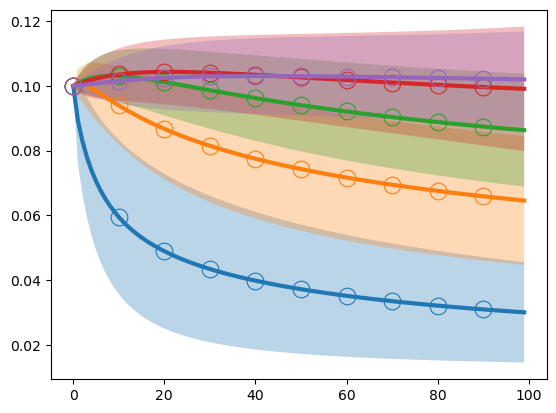

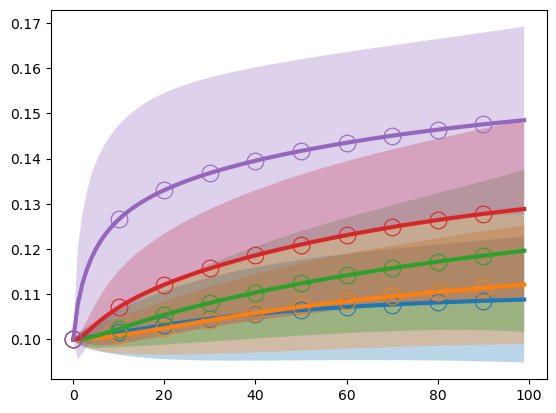

[0.0155123  0.01989838 0.01747406 0.01927036 0.01482702 0.01392624
 0.01314683 0.01795068 0.01978117 0.02074435]


In [3]:
import matplotlib.pyplot as plt

mean = np.mean(datas, axis=1)
variance = np.var(datas, axis=1)
variance = np.sqrt(variance)
print(mean.shape)

fontsize = 26

def plot(mean, variance):
    plt.figure()
    for i in range(mean.shape[0]):
        plt.plot(range(mean.shape[1]), mean[i], label="MH", linewidth=3, marker="o", markevery=10, markersize=12, markerfacecolor="none", markeredgewidth=0.8)
        plt.fill_between(range(mean.shape[1]), mean[i] - variance[i], mean[i] + variance[i], alpha=0.3)
    plt.show()

plot(mean[:5], variance[:5])
plot(mean[5:], variance[5:])

print(variance[:, -1])

## 2 Search for the best convergence

The data used in this section is in `trace/search-best`.

In [4]:
limit = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
limit = limit / np.sum(limit)

best_datas = load_data("../trace/search-best")

minerr = 100
minidx = 0

for i in range(best_datas.shape[1]):
    best_limit = best_datas[:, i, :][:, -1]
    x_err = np.linalg.norm(best_limit - limit)
    if x_err < minerr:
        minerr = x_err
        minidx = i
    print(x_err)

print(minidx, minerr)

0.03967255530332592
0.15388969740578065
0.1048622830449061
0.08296836762340103
0.04667566512709126
0.027582428097036375
0.12087123116467977
0.06425729214793799
0.03101464629621126
0.10611682282410612
0.018227997461946477
0.0838417428642743
0.05313017991860781
0.16175920022553444
0.04139212423078047
0.058496847617837876
0.10378345276153787
0.1177915993628848
0.09263116481023494
0.024671048047366254
0.06620820760017049
0.08996818972949171
0.07614981856578995
0.05323636091020702
0.08305639234247034
0.08698123568738574
0.0005893163643347504
0.0725683139279121
0.03833952162643186
0.09080081883762744
0.03993177110561099
0.013964398403537732
0.06959556868192113
0.112434397050854
0.08869200932957418
0.0414724784511148
0.03548064908016763
0.048279811595484244
0.04666913024328335
0.2153631984874621
0.10203563910502056
0.06616393391826093
0.025984863062787494
0.0373638406641185
0.06271635844444994
0.13655162141872473
0.0062385164313757905
0.044644774465073436
0.14460271624971455
0.011117319349310

(10, 100)


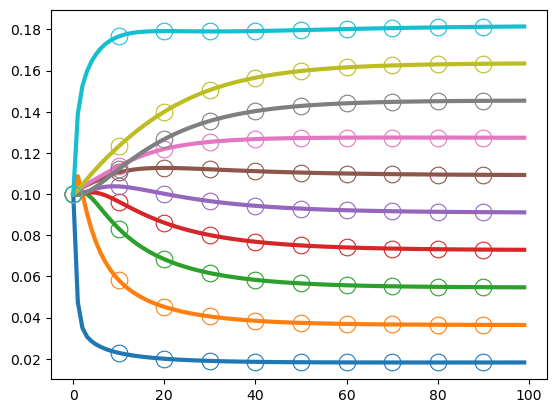

In [5]:
best_convergence = best_datas[:, 26, :]
print(best_convergence.shape)

def plot_data(x):
    plt.figure()
    for i in range(x.shape[0]):
        plt.plot(range(x.shape[1]), x[i], label="MH", linewidth=3, marker="o", markevery=10, markersize=12, markerfacecolor="none", markeredgewidth=0.8)
    plt.show()

plot_data(best_convergence)

## 3 Compare with C3P

search $\eta$: [0.1, 0.5, 1, 2, 4, 8, 16, 24, 32, 45, 50, 60, 70, 80, 90, 100, 110, 105, 22, 6]

In [6]:
c3p_datas = load_data("../trace/c3p")

c3p_minerr = 100
c3p_minidx = 0
print(c3p_datas.shape)
for i in range(c3p_datas.shape[1]):
    c3p_limit = c3p_datas[:, i, :][:, -1]
    c3p_err = np.linalg.norm(c3p_limit - limit)
    if c3p_err < c3p_minerr:
        c3p_minerr = c3p_err
        c3p_minidx = i
    print(c3p_err)

print(c3p_minidx, c3p_minerr)

(10, 20, 100)
0.19815306343634503
0.03494802664125946
0.018001439914654305
0.08458513545486689
0.06173797026853233
0.04445183491578273
0.16159812867862278
0.10085469297197737
0.13186782830088206
0.003097315952416038
0.0024041072172052177
0.037643352339544515
0.07166993275125273
0.012907717254911006
0.040235653497477715
0.05791668891767962
0.046569222007761535
0.06821208507833225
0.005034507644519698
0.050943302835880035
10 0.0024041072172052177


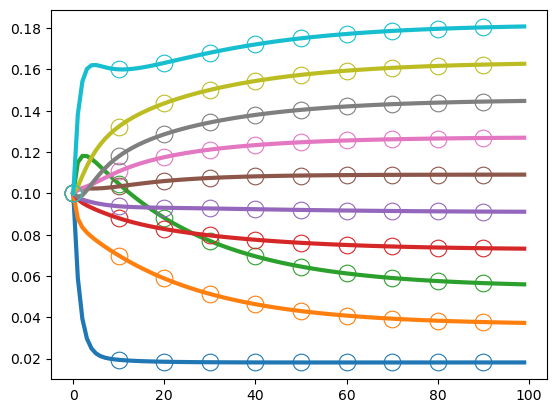

In [7]:
plot_data(c3p_datas[:, 10, :])

### compare L1-Norm

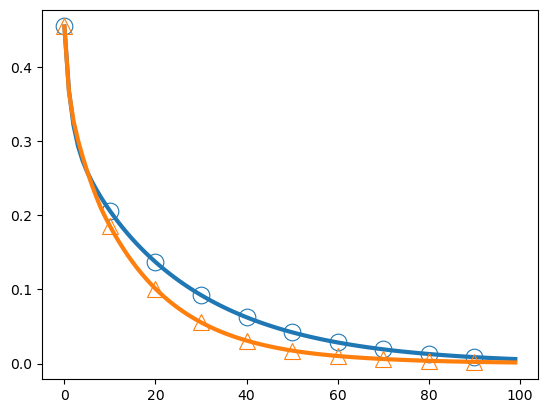

In [8]:
def plot_norm(best, x, limit):
    limit = limit.reshape(-1, 1)
    plt.figure()
    x_err = np.linalg.norm(x - limit, axis=0, ord=1)  
    best_err = np.linalg.norm(best - limit, axis=0, ord=1)  
    plt.plot(range(x_err.shape[0]), x_err, label="MH", linewidth=3, marker="o", markevery=10, markersize=12, markerfacecolor="none", markeredgewidth=0.8)
    plt.plot(range(best_err.shape[0]), best_err, label="MH", linewidth=3, marker="^", markevery=10, markersize=12, markerfacecolor="none", markeredgewidth=0.8)
    plt.show()

plot_norm(best_datas[:, 26, :], c3p_datas[:, 10, :], limit)

### compare variance

markov: 
[0.0155123  0.01989838 0.01747406 0.01927036 0.01482702 0.01392624
 0.01314683 0.01795068 0.01978117 0.02074435]

In [9]:
c3p_variance = np.var(c3p_datas, axis=1)
c3p_variance = np.sqrt(c3p_variance)
print(variance[:, -1], np.sum(variance[:, -1]))
print(c3p_variance[:, -1], np.sum(c3p_variance[:, -1]))

[0.0155123  0.01989838 0.01747406 0.01927036 0.01482702 0.01392624
 0.01314683 0.01795068 0.01978117 0.02074435] 0.1725313844535673
[0.00534864 0.01509061 0.02168392 0.01937156 0.02170315 0.02631932
 0.02068171 0.01996798 0.01596421 0.01436225] 0.18049334870854666


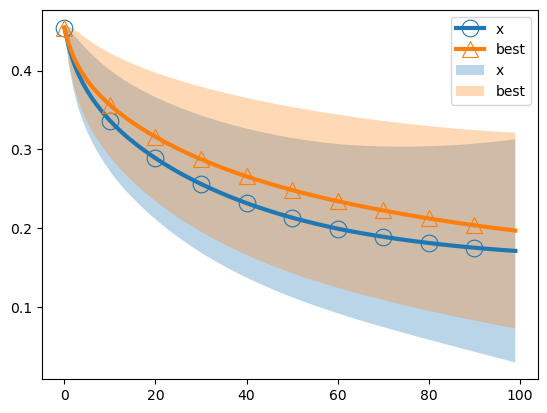

In [10]:
def plot_all_norm(best, x, limit):
    limit = limit.reshape(-1, 1)
    plt.figure()
    x_errs = []
    best_errs = []
    for i in range(x.shape[1]):
        x_err = np.linalg.norm(x[:, i, :] - limit, axis=0, ord=1)
        x_errs.append(x_err)
    for i in range(best.shape[1]):
        best_err = np.linalg.norm(best[:, i, :] - limit, axis=0, ord=1)
        best_errs.append(best_err)

    x_errs = np.array(x_errs)
    best_errs = np.array(best_errs)

    x_errs_mean = np.mean(x_errs, axis=0)
    best_errs_mean = np.mean(best_errs, axis=0)

    x_errs_std = np.std(x_errs, axis=0)
    best_errs_std = np.std(best_errs, axis=0)

    plt.plot(range(x_errs_mean.shape[0]), x_errs_mean, label="x", linewidth=3, marker="o", markevery=10, markersize=12, markerfacecolor="none", markeredgewidth=0.8)
    plt.plot(range(best_errs_mean.shape[0]), best_errs_mean, label="best", linewidth=3, marker="^", markevery=10, markersize=12, markerfacecolor="none", markeredgewidth=0.8)
    plt.fill_between(range(x_errs_mean.shape[0]), x_errs_mean - x_errs_std, x_errs_mean + x_errs_std, alpha=0.3, label="x")
    plt.fill_between(range(best_errs_mean.shape[0]), best_errs_mean - best_errs_std, best_errs_mean + best_errs_std, alpha=0.3, label="best")
    plt.legend()
    plt.show()
    
plot_all_norm(best_datas, c3p_datas, limit)
# # calculate max and min of best_datas[:, i, :]
# best_maxs = np.max(best_datas, axis=1)
# best_mins = np.min(best_datas, axis=1)

## 4 Unstable Input Rate

### 4.1 change limit

(10, 100, 99)
0.03152244116560277
0.08781008771630715
0.05236270140483799
0.053342832101281934
0.04389825505805694
0.036732964100186026
0.032440667625202924
0.023152350745274705
0.00025479839525049714
0.02213547393293298
0.001912623650614229
0.01126159591260887
0.01622471181291743
0.0014672811349189085
0.043190160501309666
0.04808261555374134
0.03686882394596944
0.036964894623623026
0.009259277703951255
0.059781153484540786
0.046159443189870565
0.06825355499097138
0.06428805913728373
0.018367786569577608
0.05086942401265115
0.04309638642255545
0.0026533610143028353
0.05357707242871919
0.022776756596997932
0.005295707136183249
0.043547589681927935
0.01735958174780973
0.04057407812186111
0.003360236237561603
0.03332436499513364
0.025584367206536285
0.030793182525177362
0.043770678863430425
0.00771094735093482
0.013431055698847928
0.04343350333750305
0.016172488537499575
0.01938343540729788
0.012931843913336136
0.026339776392601023
0.043679703153435265
0.048610079128052805
0.0133733076783

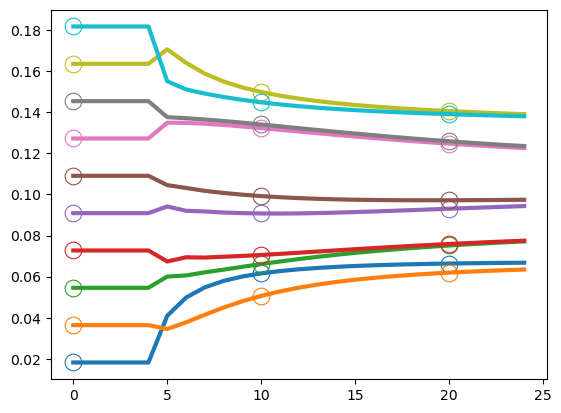

In [57]:
burst_datas = load_data("../trace/change-limit")

burst_err_min = 100
burst_err_idx_min = 0
new_limit = np.array([4, 4, 5, 5, 6, 6, 7, 7, 8, 8])
new_limit = new_limit / np.sum(new_limit)
print(burst_datas.shape)
for i in range(burst_datas.shape[1]):
    change_limit = burst_datas[:, i, :][:, -1]
    change_limit_err = np.linalg.norm(change_limit - new_limit)
    if change_limit_err < burst_err_min:
        burst_err_min = change_limit_err
        burst_err_idx_min = i
    print(change_limit_err)

print(burst_err_idx_min, burst_err_min)

# plot_datas = burst_datas[:, burst_err_idx_min, :]
# start_datas = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
# start_datas = start_datas / np.sum(start_datas)
# start_datas_copies = np.tile(start_datas.reshape(-1, 1), 5)
# plot_datas = np.concatenate((start_datas_copies, plot_datas), axis=1)
# print(plot_datas.shape)
# plot_data(plot_datas[:, :25])


### 4.2 burst

In [58]:
burst_datas = load_data("../trace/burst")

# burst_err_min = 100
# burst_err_idx_min = 0
# new_limit = np.array([4, 4, 5, 5, 6, 6, 7, 7, 8, 8])
# new_limit = new_limit / np.sum(new_limit)
# print(burst_datas.shape)
# for i in range(burst_datas.shape[1]):
#     change_limit = burst_datas[:, i, :][:, -1]
#     change_limit_err = np.linalg.norm(change_limit - new_limit)
#     if change_limit_err < burst_err_min:
#         burst_err_min = change_limit_err
#         burst_err_idx_min = i
#     print(change_limit_err)

# print(burst_err_idx_min, burst_err_min)

# plot_datas = burst_datas[:, burst_err_idx_min, :]
# start_datas = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
# start_datas = start_datas / np.sum(start_datas)
# start_datas_copies = np.tile(start_datas.reshape(-1, 1), 5)
# plot_datas = np.concatenate((start_datas_copies, plot_datas), axis=1)
# print(plot_datas.shape)
# plot_data(plot_datas[:, :25])

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 2 dimensions. The detected shape was (10, 1) + inhomogeneous part.